<a href="https://colab.research.google.com/github/shubham0204/ImageColorization/blob/master/ImageColorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The project is also available at GitHub here -> https://github.com/shubham0204/ImageColorization

# 1) Importing the libraries
We import [TensorFlow](https://www.tensorflow.org/), [Numpy](http://www.numpy.org/) and [scikit-image](https://scikit-image.org/) module for playing around with images. Printing out the TensorFlow version is a good practice to see that everything is working fine. ( See [Colorizer.py](https://github.com/shubham0204/ImageColorization/blob/master/Colorizer.py) on GitHub )

In [2]:

from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import models
from skimage.io import imshow , imsave
import tensorflow as tf
import numpy as np

print( tf.VERSION ) 


1.12.0


# 2) Loading the data
We load the data which is stored in .npy files using the `np.load` method. We print out the shapes of the training and testing data.


*   To convert your own images to .npy files, refer to the GitHub project and see the [Parser.py ](https://github.com/shubham0204/ImageColorization/blob/master/Parser.py)file.
*   For sample data, download the three files from the [sample_data directory](https://github.com/shubham0204/ImageColorization/tree/master/sample_data) of the GitHub project.




In [3]:

X = np.load( 'X.npy' ) 
Y = np.load( 'Y.npy' ) 
test_X = np.load( 'test_X.npy' ) 

print( X.shape ,Y.shape ) 
print( test_X.shape ) 


(190, 64, 64, 1) (190, 64, 64, 3)
(6, 64, 64, 1)


# 3) Defining the model
We define our Convolutional Auto Encoder model using the Keras [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential).


*   We use a low dropout rate of 0.3,
*   `DIMEN` is the dimension of the image which acts as an input to the model. In our case, it is 64 or the image has dimensions of 64px * 64px.

We compile the model to use the Adam optimizer with a learning rate of 0.0001. The loss function is mean squared error and we output the `mae` or mean absolute error of the model during training. ( See [Colorizer.py](https://github.com/shubham0204/ImageColorization/blob/master/Colorizer.py) on GitHub )



In [0]:

dropout_rate = 0.5
DIMEN = 64
kernel_size = ( 4 , 4 )

NEURAL_SCHEMA = [

    Conv2D( 32 , input_shape=( DIMEN , DIMEN , 1 ) , kernel_size=kernel_size , strides=1,activation=relu),
    Dropout( dropout_rate ) ,
    Conv2D( 64, kernel_size=kernel_size, strides=1, activation=relu),
    Dropout(dropout_rate),
    Conv2D( 128, kernel_size=kernel_size, strides=1, activation=relu) ,
    Dropout(dropout_rate),
    Conv2D( 256, kernel_size=kernel_size, strides=1, activation=relu),
    Dropout(dropout_rate),
    Conv2DTranspose( 128, kernel_size=kernel_size, strides=1, activation=relu),
    Dropout(dropout_rate),
    Conv2DTranspose( 64, kernel_size=kernel_size, strides=1, activation=relu),
    Dropout(dropout_rate),
    Conv2DTranspose( 32, kernel_size=kernel_size, strides=1, activation=relu),
    Dropout(dropout_rate),
    Conv2DTranspose( 3, kernel_size=kernel_size, strides=1, activation=relu ),

]

model = tf.keras.Sequential( NEURAL_SCHEMA )

model.compile(
    optimizer=optimizers.Adam(0.0001),
    loss=losses.mean_squared_error,
    metrics=['mae'],
)


# 4) Training the model
We train the model over the training dataset using the `fit()` method.  ( See [Colorizer.py](https://github.com/shubham0204/ImageColorization/blob/master/Colorizer.py) on GitHub )


**Note : If required, load the model which was trained earlier or use the model located in the [models](https://github.com/shubham0204/ImageColorization/tree/master/models) directory on GitHub.**

In [0]:

model = models.load_model( 'model.h5' ) 


In [0]:

model.fit(
    X, 
    Y, 
    batch_size=3 , 
    epochs=100
)


Epoch 1/100
190/190 [==============================] - 5s 28ms/step - loss: 0.3294 - mean_absolute_error: 0.2514
Epoch 2/100
190/190 [==============================] - 4s 21ms/step - loss: 0.1734 - mean_absolute_error: 0.1762
Epoch 3/100
190/190 [==============================] - 4s 21ms/step - loss: 0.1215 - mean_absolute_error: 0.1458
Epoch 4/100
190/190 [==============================] - 4s 21ms/step - loss: 0.1008 - mean_absolute_error: 0.1328
Epoch 5/100
190/190 [==============================] - 4s 21ms/step - loss: 0.0887 - mean_absolute_error: 0.1246
Epoch 6/100
190/190 [==============================] - 4s 21ms/step - loss: 0.0808 - mean_absolute_error: 0.1186
Epoch 7/100
190/190 [==============================] - 4s 21ms/step - loss: 0.0754 - mean_absolute_error: 0.1144
Epoch 8/100
190/190 [==============================] - 4s 21ms/step - loss: 0.0702 - mean_absolute_error: 0.1104
Epoch 9/100
190/190 [==============================] - 4s 21ms/step - loss: 0.0667 - mean_absolu

We save the model to export it or download it to our local machine using `model.save()` method. **Tip : To use it on an Android or iOS device, use [this notebook](https://colab.research.google.com/drive/1IUIn9ffk5ICKujqPyuGaHL2irQ9Wmtpm) to convert the model.h5 to a [TensorFlow Lite](https://www.tensorflow.org/lite) model ( .tflite ).**

In [0]:

model.save( 'model.h5')


# 5) Colorizing the images



1.   We take the grayscale images and feed them to our model
2.   To avoid negative values, we perform a operation to convert all negative values to 0.
3.   We multiply the values by 255 ( the images used for training were normalised ).
4.   Convert the values to a image array using `imsave( )` method.

( See [MainFile.py ](https://github.com/shubham0204/ImageColorization/blob/master/MainFile.py)on GitHub )





/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


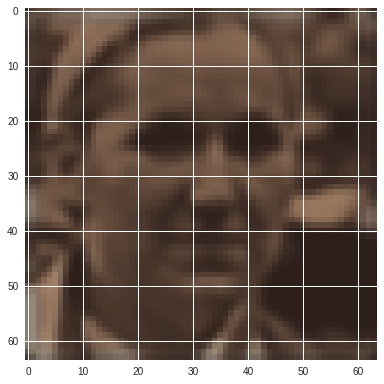

In [10]:

values = model.predict( test_X )
values = np.maximum( values , 0 )

for i in range( 3 ):
    image_final = ( values[i] * 255).astype( np.uint8 )
    imsave( '{}.png'.format( i + 1 ) , image_final  )
    imshow( image_final )
